In [72]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from tqdm import tqdm

In [73]:
adj_mx_bay = pd.read_pickle("./DCRNN/data/sensor_graph/adj_mx_bay.pkl")
adj_mx_la = pd.read_pickle("./DCRNN/data/sensor_graph/adj_mx_la.pkl")

In [74]:
sensor_list_bay = adj_mx_bay[0]
sensor_list_la = adj_mx_la[0]

In [53]:
train_LA = np.load("./DCRNN/data/METR-LA/train.npz")
test_LA = np.load("./DCRNN/data/METR-LA/test.npz")
val_LA = np.load("./DCRNN/data/METR-LA/val.npz")

In [54]:
train_BAY = np.load("./DCRNN/data/PEMS-BAY/train.npz")
test_BAY = np.load("./DCRNN/data/PEMS-BAY/test.npz")
val_BAY = np.load("./DCRNN/data/PEMS-BAY/val.npz")

In [55]:
print(train_LA["x"].shape, train_LA["y"].shape, train_LA["x_offsets"].shape, train_LA["y_offsets"].shape)
print(test_LA["x"].shape, test_LA["y"].shape, test_LA["x_offsets"].shape, test_LA["y_offsets"].shape)
print(val_LA["x"].shape, val_LA["y"].shape, val_LA["x_offsets"].shape, val_LA["y_offsets"].shape)

(23974, 12, 207, 2) (23974, 12, 207, 2) (12, 1) (12, 1)
(6850, 12, 207, 2) (6850, 12, 207, 2) (12, 1) (12, 1)
(3425, 12, 207, 2) (3425, 12, 207, 2) (12, 1) (12, 1)


In [56]:
print(train_BAY["x"].shape, train_BAY["y"].shape, train_BAY["x_offsets"].shape, train_BAY["y_offsets"].shape)
print(test_BAY["x"].shape, test_BAY["y"].shape, test_BAY["x_offsets"].shape, test_BAY["y_offsets"].shape)
print(val_BAY["x"].shape, val_BAY["y"].shape, val_BAY["x_offsets"].shape, val_BAY["y_offsets"].shape)

(36465, 12, 325, 2) (36465, 12, 325, 2) (12, 1) (12, 1)
(10419, 12, 325, 2) (10419, 12, 325, 2) (12, 1) (12, 1)
(5209, 12, 325, 2) (5209, 12, 325, 2) (12, 1) (12, 1)


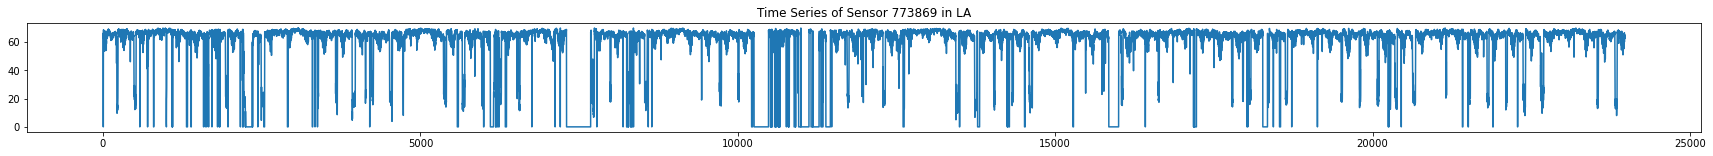

In [58]:
plt.figure(figsize=(30, 2))
plt.plot(train_LA["x"][:, :, 0, 0][:, 0])
plt.title("Time Series of Sensor " + adj_mx_la[0][0] + " in LA")
plt.show()

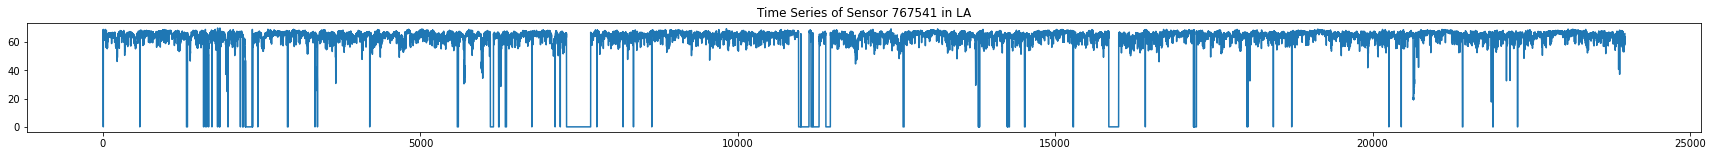

In [59]:
plt.figure(figsize=(30, 2))
plt.plot(train_LA["x"][:, :, 1, 0][:, 0])
plt.title("Time Series of Sensor " + adj_mx_la[0][1] + " in LA")
plt.show()

In [103]:
sensor_avg_mae = [[] for i in range(12)]
sensor_avg_rmse = [[] for i in range(12)]
sensor_avg_mape = [[] for i in range(12)]
for i in tqdm(range(len(sensor_list_la))):
    if i > 10:
        break
    print("Sensor: ", sensor_list_la[i], end=", ")
    train_X = train_LA["x"][:, :, i, 0]
    train_y = train_LA["y"][:, :, i, 0]
    val_X = val_LA["x"][:, :, i, 0]
    val_y = val_LA["y"][:, :, i, 0]
    for comp in range(1, 13):
        # print("Component: ", comp, end=", ")
        regr = make_pipeline(StandardScaler(), PLSRegression(n_components=comp))
        regr = regr.fit(train_X, train_y)
        prediction = regr.predict(val_X)
        mae, rmse, mape = [], [], []
        for pred, gt in zip(prediction, val_y):
            mae.append(mean_absolute_error(pred, gt))
            rmse.append(np.sqrt(mean_squared_error(pred, gt)))
            mape.append(mean_absolute_percentage_error(pred, gt))
        # print("AVG MAE: ", round(sum(mae) / len(mae), 3), end=", ")
        # print("AVG RMSE: ", round(sum(rmse) / len(rmse), 3), end=", ")
        # print("AVG MAPE: ", round(sum(mape) / len(mape), 3))
        sensor_avg_mae[comp - 1].append(sum(mae) / len(mae))
        sensor_avg_rmse[comp - 1].append(sum(rmse) / len(rmse))
        sensor_avg_mape[comp - 1].append(sum(mape) / len(mape))

  0%|          | 0/207 [00:00<?, ?it/s]

Sensor:  773869, 

  0%|          | 1/207 [00:17<59:58, 17.47s/it]

Sensor:  767541, 

  1%|          | 2/207 [00:36<1:03:12, 18.50s/it]

Sensor:  767542, 

  1%|▏         | 3/207 [00:55<1:03:12, 18.59s/it]

Sensor:  717447, 

  2%|▏         | 4/207 [01:14<1:04:02, 18.93s/it]

Sensor:  717446, 

  2%|▏         | 5/207 [01:33<1:03:43, 18.93s/it]

Sensor:  717445, 

  3%|▎         | 6/207 [01:55<1:06:57, 19.99s/it]

Sensor:  773062, 

  3%|▎         | 7/207 [02:13<1:04:24, 19.32s/it]

Sensor:  767620, 

  4%|▍         | 8/207 [02:32<1:03:28, 19.14s/it]

Sensor:  737529, 

  4%|▍         | 9/207 [02:54<1:05:52, 19.96s/it]

Sensor:  717816, 

  5%|▍         | 10/207 [03:16<1:07:50, 20.66s/it]

Sensor:  765604, 

  5%|▌         | 11/207 [03:35<1:03:57, 19.58s/it]


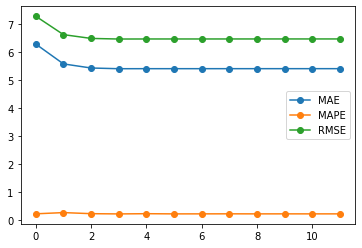

In [104]:
plt.plot(np.mean(np.array(sensor_avg_mae), axis=1), "o-", label="MAE")
plt.plot(np.mean(np.array(sensor_avg_mape), axis=1), "o-", label="MAPE")
plt.plot(np.mean(np.array(sensor_avg_rmse), axis=1), "o-", label="RMSE")
plt.legend()
plt.show()